In [63]:
#Color Spaces and Reading Images in OpenCV

!pip install opencv-python
import cv2

In [4]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [5]:
len(flags)

346

In [6]:
flags[40]

'COLOR_BAYER_GR2GRAY'

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
nemo = cv2.imread("C:/Users/vivek/Downloads/nemo.jpg")

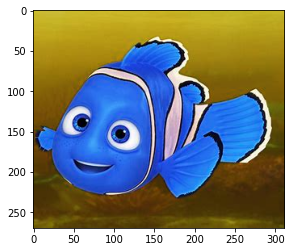

In [28]:
plt.imshow(nemo)
plt.show()

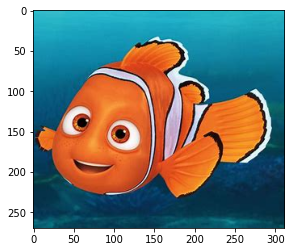

In [29]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [16]:
#Visualizing Nemo in RGB Color Space

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

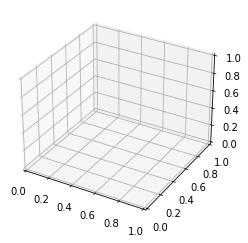

In [31]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [32]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [34]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

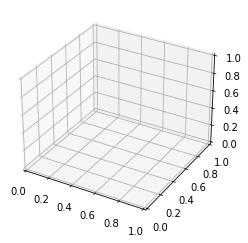

In [ ]:
# Visualizing Nemo in HSV Color Space

In [35]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

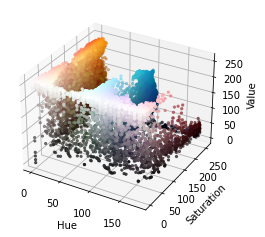

In [36]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [40]:
# picking out range

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [41]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [42]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

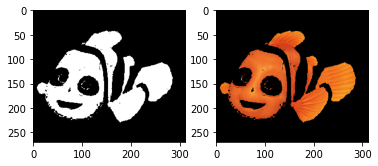

In [43]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

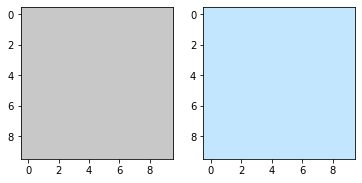

In [50]:
from matplotlib.colors import hsv_to_rgb

light_white = (0, 0, 200)
dark_white = (145, 60, 255)


lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

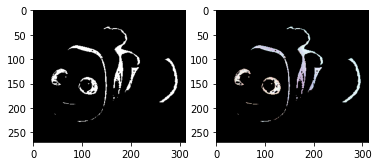

In [51]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

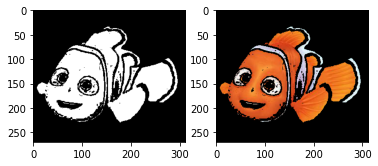

In [53]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()